# POLO Ranking Model Score Analysis

In [1]:
import pandas as pd
import os

### Config - change the score_date to the appropriate value

In [2]:
score_date = '2020-02-25'
analysis_dir = 'U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Polo_Rank_Model\\Analysis\\{}\\'.format(score_date)
print(analysis_dir)

if not os.path.exists(analysis_dir):
    os.mkdir(analysis_dir)

U:\Source Files\Data Analytics\Data-Science\Data\Polo_Rank_Model\Analysis\2020-02-25\


### Read data

In [3]:
df = pd.read_csv('C:\\Users\\glappe\\Documents\\udrive\\Data\\Polo_Rank_Model\\Polo_Addr_Rank_Scored_PPD_DPC_Pop.csv', 
                 index_col=0)

In [4]:
df.head()

,LIC_STATE_MATCH,PCP,ENT_COMM_SRC_CAT_CODE,ENT_COMM_COMM_TYPE,ADDR_AGE_YRS,YOP_YRS,DOCTOR_AGE_YRS,PPD_ADDRESS_TYPE,PPD_REGION,PPD_DIVISION,...,POST_CITY_CD,POST_STATE_CD,POST_ZIP,ENT_COMM_BEGIN_DT,ENT_COMM_END_DT,ENT_COMM_COMM_ID,ENT_COMM_ENTITY_ID,PRED_CLASS,PRED_PROBABILITY,RANK_ROUND
0,0,1,PPA,OF,18.849315,20.224658,47.241096,1,3,5,...,CHARLOTTE,NC,28203,2001-05-17 00:00:00.000000,2020-03-18 11:21:55.035513,2886432,1234606,0,0.314223,3
1,0,1,GROUP,GROUP,16.019178,20.224658,47.241096,1,3,5,...,ASHEVILLE,NC,28805,2004-03-15 00:00:00.000000,2020-03-18 11:21:55.035513,6535763,1234606,0,0.348911,3
2,0,1,DEA,OF,11.334247,20.224658,47.241096,1,3,5,...,ASHEVILLE,NC,28805,2008-11-19 00:00:00.000000,2020-03-18 11:21:55.035513,11727862,1234606,0,0.332432,3
3,1,1,NPI,OF,4.468493,20.224658,60.252055,2,4,8,...,SUN CITY WEST,AZ,85375,2015-09-30 00:00:00.000000,2020-03-18 11:21:55.035513,15446117,1234619,1,0.953620,10
4,1,1,DEA,OF,1.512329,20.224658,47.241096,2,3,7,...,NEW ORLEANS,LA,70115,2018-09-13 00:00:00.000000,2020-03-18 11:21:55.035513,22635755,1234632,1,0.911685,9


In [5]:
df.shape

(915671, 47)

In [6]:
from matplotlib import pyplot as plt

(array([ 14279.,   9702.,   8510.,  12993.,  21269.,  15299.,  15192.,
         12384.,  11184.,  13854.,  16302.,  26332.,  38385.,  44772.,
         51966.,  73510.,  75095.,  90142., 146376., 218125.]),
 array([1.77289440e-05, 4.99717995e-02, 9.99258700e-02, 1.49879941e-01,
        1.99834011e-01, 2.49788082e-01, 2.99742152e-01, 3.49696223e-01,
        3.99650293e-01, 4.49604364e-01, 4.99558434e-01, 5.49512505e-01,
        5.99466576e-01, 6.49420646e-01, 6.99374717e-01, 7.49328787e-01,
        7.99282858e-01, 8.49236928e-01, 8.99190999e-01, 9.49145069e-01,
        9.99099140e-01]),
 <a list of 20 Patch objects>)

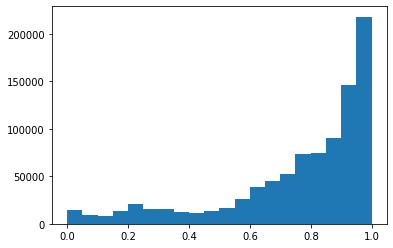

In [7]:
plt.hist(df['PRED_PROBABILITY'], bins=20)

In [8]:
hist_df = df.groupby(['PPD_ME', 'ENT_COMM_COMM_ID'])['PRED_PROBABILITY'].mean().reset_index()
hist_df.head()

,PPD_ME,ENT_COMM_COMM_ID,PRED_PROBABILITY
0,102000030,2886432,0.314223
1,102000030,6535763,0.348911
2,102000030,11727862,0.332432
3,102000048,15446117,0.953620
4,102000056,22635755,0.911685


In [9]:
from math import floor

In [10]:
hist_df['PRED_BIN'] = hist_df['PRED_PROBABILITY'].apply(lambda x: floor(x/.05)*.05 + .05)

In [11]:
hist = hist_df.groupby('PRED_BIN').size().reset_index().rename(columns={0:'COUNT'})
hist

,PRED_BIN,COUNT
0,0.05,14185
1,0.10,9627
2,0.15,8482
3,0.20,12845
4,0.25,21080
5,0.30,15154
6,0.35,14960
7,0.40,12159
8,0.45,11218
9,0.50,13469


In [12]:
hist['PROPORTION'] = hist['COUNT'] / hist['COUNT'].sum()
hist

,PRED_BIN,COUNT,PROPORTION
0,0.05,14185,0.015995
1,0.10,9627,0.010856
2,0.15,8482,0.009565
3,0.20,12845,0.014484
4,0.25,21080,0.023770
5,0.30,15154,0.017088
6,0.35,14960,0.016869
7,0.40,12159,0.013711
8,0.45,11218,0.012650
9,0.50,13469,0.015188


In [86]:
hist.to_csv(analysis_dir + 'Population_Address_Quality_Hist.csv', index=False)

### Mean Pred Probability by Source

In [87]:
source_scores_counts_df = pd.merge(df.groupby('ENT_COMM_SRC_CAT_CODE')['PRED_PROBABILITY'].mean().reset_index(),
                                  df.groupby('ENT_COMM_SRC_CAT_CODE').size().reset_index(),
                                  on='ENT_COMM_SRC_CAT_CODE',
                                  how='inner').rename(columns={0:'COUNT'})
source_scores_counts_df['PROPORTION'] = source_scores_counts_df['COUNT'] / source_scores_counts_df['COUNT'].sum()
source_scores_counts_df

,ENT_COMM_SRC_CAT_CODE,PRED_PROBABILITY,COUNT,PROPORTION
0,ACS,0.742946,41347,0.045155
1,ACXIOMLODE,0.728032,145,0.000158
2,ACXIOMNCOA,0.756841,6549,0.007152
3,ACXIOMPLUS,0.810635,2,0.000002
4,ADDR-VER,0.770382,125,0.000137
5,ADMIT-HOS,0.454261,5897,0.006440
6,ADVR,0.525816,13,0.000014
7,AFFIL-GRP,0.741470,10217,0.011158
8,AMA-ORG,0.730507,1138,0.001243
9,AMC,0.845105,3686,0.004025


In [88]:
source_scores_counts_df.to_csv(analysis_dir + 'source_scores_counts.csv', index=False)

In [65]:
df.dtypes

LIC_STATE_MATCH              int64
PCP                          int64
ENT_COMM_SRC_CAT_CODE       object
ENT_COMM_COMM_TYPE          object
ADDR_AGE_YRS               float64
YOP_YRS                    float64
DOCTOR_AGE_YRS             float64
PPD_ADDRESS_TYPE             int64
PPD_REGION                   int64
PPD_DIVISION                 int64
PPD_GROUP                    int64
PPD_MSA_POPULATION_SIZE     object
PPD_MD_DO_CODE               int64
PPD_MICRO_METRO_IND          int64
PPD_GENDER                   int64
PPD_TOP_CD                   int64
PPD_PE_CD                    int64
PPD_PRIM_SPEC_CD            object
PPD_POLO_STATE              object
HIST_ENT_ID_ADDR_COUNT       int64
HIST_ENT_ALL_ADDR_COUNT      int64
CURR_ENT_ID_ADDR_COUNT       int64
CURR_ENT_ALL_ADDR_COUNT      int64
CURR_USG_ALL_ADDR_COUNT    float64
PPD_ME                       int64
PPD_FIRST_NAME              object
PPD_MIDDLE_NAME             object
PPD_LAST_NAME               object
PPD_SUFFIX          

In [66]:
df['ADDR_AGE_BIN'] = df['ADDR_AGE_YRS'].apply(lambda x: floor(x/5)*5 + 5)

In [89]:
addr_ages_scores_df = pd.merge(df.groupby('ADDR_AGE_BIN')['PRED_PROBABILITY'].mean().reset_index(),
                               df.groupby('ADDR_AGE_BIN').size().reset_index(),
                               on='ADDR_AGE_BIN',
                               how='inner').rename(columns={0:'COUNT'})
addr_ages_scores_df['PROPORTION'] = addr_ages_scores_df['COUNT'] / addr_ages_scores_df['COUNT'].sum()
addr_ages_scores_df

,ADDR_AGE_BIN,PRED_PROBABILITY,COUNT,PROPORTION
0,5,0.839749,339034,0.370257
1,10,0.714735,299173,0.326725
2,15,0.708611,174088,0.190121
3,20,0.703223,69202,0.075575
4,25,0.739399,14161,0.015465
5,30,0.759525,7601,0.008301
6,35,0.744343,4576,0.004997
7,40,0.742251,1962,0.002143
8,45,0.794747,983,0.001074
9,50,0.805115,361,0.000394


In [90]:
addr_ages_scores_df.to_csv(analysis_dir + 'addr_ages_scores.csv', index=False)

In [91]:
df['YOP_BIN'] = df['YOP_YRS'].apply(lambda x: floor(x/5)*5 + 5)
yop_scores_df = pd.merge(df.groupby('YOP_BIN')['PRED_PROBABILITY'].mean().reset_index(),
                               df.groupby('YOP_BIN').size().reset_index(),
                               on='YOP_BIN',
                               how='inner').rename(columns={0:'COUNT'})
yop_scores_df['PROPORTION'] = yop_scores_df['COUNT'] / yop_scores_df['COUNT'].sum()

yop_scores_df

,YOP_BIN,PRED_PROBABILITY,COUNT,PROPORTION
0,5,0.736610,3384,0.003696
1,10,0.791389,54108,0.059091
2,15,0.790669,83537,0.091230
3,20,0.758175,119645,0.130664
4,25,0.753239,133024,0.145275
5,30,0.753003,127433,0.139169
6,35,0.755335,127976,0.139762
7,40,0.754628,117758,0.128603
8,45,0.747191,79694,0.087033
9,50,0.763248,41904,0.045763


In [92]:
yop_scores_df.to_csv(analysis_dir + 'yop_scores_counts.csv', index=False)

   ### Mean quality score by specialty

In [93]:
specialty_counts_scores_df = pd.merge(df.groupby('PPD_PRIM_SPEC_CD').size().reset_index(), 
                                      df.groupby('PPD_PRIM_SPEC_CD')['PRED_PROBABILITY'].mean().reset_index(),
                                      on='PPD_PRIM_SPEC_CD',
                                      how='inner').rename(columns={0: 'COUNT'}).sort_values(by='PRED_PROBABILITY', ascending=False).reset_index(drop=True)
specialty_counts_scores_df['PROPORTION'] = specialty_counts_scores_df['COUNT'] / specialty_counts_scores_df['COUNT'].sum()
specialty_counts_scores_df

,PPD_PRIM_SPEC_CD,COUNT,PRED_PROBABILITY,PROPORTION
0,SMA,4,0.982903,0.000004
1,CMG,2,0.981291,0.000002
2,IRD,5,0.980921,0.000005
3,SMO,1,0.946777,0.000001
4,HPP,5,0.932082,0.000005
...,...,...,...,...
253,PSH,8,0.606148,0.000009
254,RP,2,0.553994,0.000002
255,PHM,3,0.548426,0.000003
256,PLI,2,0.462271,0.000002


In [94]:
specialty_counts_scores_df.to_csv(analysis_dir + 'specialty_counts_scores.csv', index=False)

In [96]:
df['PPD_ME'].drop_duplicates().shape[0]

624847

In [97]:
df['ENT_COMM_COMM_ID'].drop_duplicates().shape[0]

524705

In [98]:
df.shape[0]

915671

### Address Count Per Physician - Hist

In [13]:
addr_count_freq_hist = df[['PPD_ME', 'ENT_COMM_COMM_ID']].drop_duplicates().groupby('PPD_ME').size().reset_index().rename(columns={0:'COUNT'}).groupby('COUNT').size().reset_index().rename(columns={0:'FREQUENCY'})
addr_count_freq_hist

,COUNT,FREQUENCY
0,1,405849
1,2,177395
2,3,40259
3,4,1318
4,5,24
5,6,1
6,7,1


In [17]:
addr_count_freq_hist.to_csv(analysis_dir + 'addr_count_freq_hist.csv')

# Physicians with Multiple Addresses

In [13]:
multiple_addr_mes = df[['PPD_ME', 'ENT_COMM_COMM_ID']].drop_duplicates().groupby('PPD_ME').size().reset_index().rename(columns={0:'COUNT'})
multiple_addr_mes = multiple_addr_mes[multiple_addr_mes['COUNT'] >= 2]
multiple_addr_mes


,PPD_ME,COUNT
0,102000030,3
3,102000072,2
5,102000099,2
6,102000129,2
7,102000145,2
...,...,...
624834,96501880032,2
624836,96501890011,3
624839,96501910021,2
624841,96501930013,2


In [14]:
df_multiple = df.merge(multiple_addr_mes, on='PPD_ME', how='inner')
df_multiple = df_multiple[df_multiple['COUNT'].apply(lambda x: x is not None)]
df_multiple.head()

,LIC_STATE_MATCH,PCP,ENT_COMM_SRC_CAT_CODE,ENT_COMM_COMM_TYPE,ADDR_AGE_YRS,YOP_YRS,DOCTOR_AGE_YRS,PPD_ADDRESS_TYPE,PPD_REGION,PPD_DIVISION,...,POST_STATE_CD,POST_ZIP,ENT_COMM_BEGIN_DT,ENT_COMM_END_DT,ENT_COMM_COMM_ID,ENT_COMM_ENTITY_ID,PRED_CLASS,PRED_PROBABILITY,RANK_ROUND,COUNT
0,0,1,PPA,OF,18.849315,20.224658,47.241096,1,3,5,...,NC,28203,2001-05-17 00:00:00.000000,2020-03-18 11:21:55.035513,2886432,1234606,0,0.314223,3,3
1,0,1,GROUP,GROUP,16.019178,20.224658,47.241096,1,3,5,...,NC,28805,2004-03-15 00:00:00.000000,2020-03-18 11:21:55.035513,6535763,1234606,0,0.348911,3,3
2,0,1,DEA,OF,11.334247,20.224658,47.241096,1,3,5,...,NC,28805,2008-11-19 00:00:00.000000,2020-03-18 11:21:55.035513,11727862,1234606,0,0.332432,3,3
3,1,0,GROUP,GROUP,12.709589,20.224658,47.241096,2,3,6,...,AL,35406,2007-07-06 00:00:00.000000,2020-03-18 11:21:55.035513,6183992,1234658,1,0.918209,9,2
4,1,0,NPI,OF,2.473973,20.224658,47.241096,2,3,6,...,AL,35406,2017-09-27 00:00:00.000000,2020-03-18 11:21:55.035513,15249990,1234658,1,0.946257,9,2


In [15]:
df_multiple.shape

(492294, 48)

In [ ]:
to_del = ['LIC_STATE_MATCH', 'PCP', 'PPD_ADDRESS_']

In [16]:
df_multiple['PPD_ADDRESS_TYPE'].value_counts()

1    310307
2    180566
3      1421
Name: PPD_ADDRESS_TYPE, dtype: int64

In [17]:
df_multiple.dtypes

LIC_STATE_MATCH              int64
PCP                          int64
ENT_COMM_SRC_CAT_CODE       object
ENT_COMM_COMM_TYPE          object
ADDR_AGE_YRS               float64
YOP_YRS                    float64
DOCTOR_AGE_YRS             float64
PPD_ADDRESS_TYPE             int64
PPD_REGION                   int64
PPD_DIVISION                 int64
PPD_GROUP                    int64
PPD_MSA_POPULATION_SIZE     object
PPD_MD_DO_CODE               int64
PPD_MICRO_METRO_IND          int64
PPD_GENDER                   int64
PPD_TOP_CD                   int64
PPD_PE_CD                    int64
PPD_PRIM_SPEC_CD            object
PPD_POLO_STATE              object
HIST_ENT_ID_ADDR_COUNT       int64
HIST_ENT_ALL_ADDR_COUNT      int64
CURR_ENT_ID_ADDR_COUNT       int64
CURR_ENT_ALL_ADDR_COUNT      int64
CURR_USG_ALL_ADDR_COUNT    float64
PPD_ME                       int64
PPD_FIRST_NAME              object
PPD_MIDDLE_NAME             object
PPD_LAST_NAME               object
PPD_SUFFIX          

In [18]:
usg = pd.read_csv('C:\\Users\\glappe\\Documents\\udrive\\Data\\entity_data\\2020-02-25\\str_entity_comm_usg_at.csv')

C:\Users\glappe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
usg.head()

,entity_id,comm_cat,lgl_entity_cd,comm_usage,usg_begin_dt,comm_id,comm_type,end_dt,seasonal_add_ind,approval_id,chg_rsn_category,chg_rsn_cat_code,src_category,src_cat_code,tmp_pend_ppma_cd,update_user_id,update_dtm,opt_lock
0,1260515,A,AMA,PP,[1994/01/02:12:00:00 AM],720211,HM,[2005/11/29],N,9000031,SRC,MFLOAD,SRC-ADDR,PUBS,(null),vmanning,[2005/11/29:11:47:43 AM],2
1,1260541,A,AMA,PP,[1978/09/02:12:00:00 AM],720227,HM,[2000/01/14],N,(null),SRC,MFLOAD,SRC-ADDR,UNKNOWN,(null),aimsbtch,[2000/01/14:11:51:59 PM],1
2,1260580,A,AMA,PP,[1992/05/02:12:00:00 AM],720241,HM,[2002/10/24],N,(null),SRC,MFLOAD,SRC-ADDR,UNKNOWN,(null),jagadm,[2002/10/24:06:02:36 PM],1
3,1260593,A,AMA,PO,[1996/11/02:12:00:00 AM],720248,OF,[2003/05/07],N,(null),SRC,MFLOAD,SRC-ADDR,ACS,(null),jagadm,[2003/05/07:09:23:03 AM],1
4,1260619,A,AMA,PP,[1986/01/02:12:00:00 AM],720258,OF,[2018/12/04],N,(null),SRC,MFLOAD,SRC,MFLOAD,(null),kstellpf,[2018/12/04:09:59:25 AM],1


In [20]:
usg = usg[['entity_id', 'comm_id', 'comm_usage', 'end_dt']]

In [21]:
import numpy as np

In [22]:
usg = usg.replace('(null)', np.nan)

In [23]:
'(null)' in usg['end_dt'].values

False

In [24]:
left_on = ['ENT_COMM_ENTITY_ID', 'ENT_COMM_COMM_ID']
for c in left_on:
    df_multiple[c] = df_multiple[c].astype(int)
data = df_multiple.merge(usg,
                         left_on=['ENT_COMM_ENTITY_ID', 'ENT_COMM_COMM_ID'],
                         right_on=['entity_id', 'comm_id'],
                         how='inner')

In [25]:
data.head()

,LIC_STATE_MATCH,PCP,ENT_COMM_SRC_CAT_CODE,ENT_COMM_COMM_TYPE,ADDR_AGE_YRS,YOP_YRS,DOCTOR_AGE_YRS,PPD_ADDRESS_TYPE,PPD_REGION,PPD_DIVISION,...,ENT_COMM_COMM_ID,ENT_COMM_ENTITY_ID,PRED_CLASS,PRED_PROBABILITY,RANK_ROUND,COUNT,entity_id,comm_id,comm_usage,end_dt
0,0,1,PPA,OF,18.849315,20.224658,47.241096,1,3,5,...,2886432,1234606,0,0.314223,3,3,1234606,2886432,PO,[2004/08/30]
1,0,1,PPA,OF,18.849315,20.224658,47.241096,1,3,5,...,2886432,1234606,0,0.314223,3,3,1234606,2886432,PP,NaN
2,0,1,GROUP,GROUP,16.019178,20.224658,47.241096,1,3,5,...,6535763,1234606,0,0.348911,3,3,1234606,6535763,PO,[2006/02/15]
3,0,1,DEA,OF,11.334247,20.224658,47.241096,1,3,5,...,11727862,1234606,0,0.332432,3,3,1234606,11727862,PO,NaN
4,1,0,NPI,OF,2.473973,20.224658,47.241096,2,3,6,...,15249990,1234658,1,0.946257,9,2,1234658,15249990,PO,NaN


In [26]:
data = data[data['end_dt'].isna()]
data.head()

,LIC_STATE_MATCH,PCP,ENT_COMM_SRC_CAT_CODE,ENT_COMM_COMM_TYPE,ADDR_AGE_YRS,YOP_YRS,DOCTOR_AGE_YRS,PPD_ADDRESS_TYPE,PPD_REGION,PPD_DIVISION,...,ENT_COMM_COMM_ID,ENT_COMM_ENTITY_ID,PRED_CLASS,PRED_PROBABILITY,RANK_ROUND,COUNT,entity_id,comm_id,comm_usage,end_dt
1,0,1,PPA,OF,18.849315,20.224658,47.241096,1,3,5,...,2886432,1234606,0,0.314223,3,3,1234606,2886432,PP,NaN
3,0,1,DEA,OF,11.334247,20.224658,47.241096,1,3,5,...,11727862,1234606,0,0.332432,3,3,1234606,11727862,PO,NaN
4,1,0,NPI,OF,2.473973,20.224658,47.241096,2,3,6,...,15249990,1234658,1,0.946257,9,2,1234658,15249990,PO,NaN
5,1,0,NPI,OF,2.473973,20.224658,47.241096,2,3,6,...,15249990,1234658,1,0.946257,9,2,1234658,15249990,WEB,NaN
8,1,0,NPI,OF,5.312329,20.224658,46.241096,2,3,6,...,19762595,1234684,1,0.939727,9,2,1234684,19762595,PO,NaN


In [27]:
data['comm_usage'].value_counts()

PO      223163
PP      133385
WEB     129682
AMC       1385
BILL       168
JAMA       112
ARCH        86
MSHP        56
AMNW        50
MBR          4
Name: comm_usage, dtype: int64

In [28]:
len(data)

488091

In [29]:
data = data.groupby(['ENT_COMM_ENTITY_ID', 'ENT_COMM_COMM_ID']).first().reset_index()

In [30]:
len(data)

312788

In [31]:
data.head()

,ENT_COMM_ENTITY_ID,ENT_COMM_COMM_ID,LIC_STATE_MATCH,PCP,ENT_COMM_SRC_CAT_CODE,ENT_COMM_COMM_TYPE,ADDR_AGE_YRS,YOP_YRS,DOCTOR_AGE_YRS,PPD_ADDRESS_TYPE,...,ENT_COMM_BEGIN_DT,ENT_COMM_END_DT,PRED_CLASS,PRED_PROBABILITY,RANK_ROUND,COUNT,entity_id,comm_id,comm_usage,end_dt
0,1234606,2886432,0,1,PPA,OF,18.849315,20.224658,47.241096,1,...,2001-05-17 00:00:00.000000,2020-03-18 11:21:55.035513,0,0.314223,3,3,1234606,2886432,PP,NaN
1,1234606,11727862,0,1,DEA,OF,11.334247,20.224658,47.241096,1,...,2008-11-19 00:00:00.000000,2020-03-18 11:21:55.035513,0,0.332432,3,3,1234606,11727862,PO,NaN
2,1234658,15249990,1,0,NPI,OF,2.473973,20.224658,47.241096,2,...,2017-09-27 00:00:00.000000,2020-03-18 11:21:55.035513,1,0.946257,9,2,1234658,15249990,PO,NaN
3,1234684,19762595,1,0,NPI,OF,5.312329,20.224658,46.241096,2,...,2014-11-26 00:00:00.000000,2020-03-18 11:21:55.035513,1,0.939727,9,2,1234684,19762595,PO,NaN
4,1234723,13978885,0,1,DEA,OF,9.761644,20.224658,46.241096,2,...,2010-06-16 00:00:00.000000,2020-03-18 11:21:55.035513,1,0.505069,5,2,1234723,13978885,PO,NaN


In [32]:
phys_addrs = [data[data['ENT_COMM_ENTITY_ID'] == x] for x in data['ENT_COMM_ENTITY_ID'].values]

KeyboardInterrupt: 

In [54]:
len(phys_addrs)

312788

In [55]:
phys_addrs[0]

,ENT_COMM_ENTITY_ID,ENT_COMM_COMM_ID,LIC_STATE_MATCH,PCP,ENT_COMM_SRC_CAT_CODE,ENT_COMM_COMM_TYPE,ADDR_AGE_YRS,YOP_YRS,DOCTOR_AGE_YRS,PPD_ADDRESS_TYPE,...,ENT_COMM_BEGIN_DT,ENT_COMM_END_DT,PRED_CLASS,PRED_PROBABILITY,RANK_ROUND,COUNT,entity_id,comm_id,comm_usage,end_dt
0,1234606,2886432,0,1,PPA,OF,18.832877,20.208219,47.224658,1,...,2001-05-17 00:00:00.000000,2020-03-12 09:35:34.033300,0,0.314223,3,3,1234606,2886432,PP,NaN
1,1234606,11727862,0,1,DEA,OF,11.317808,20.208219,47.224658,1,...,2008-11-19 00:00:00.000000,2020-03-12 09:35:34.033300,0,0.332432,3,3,1234606,11727862,PO,NaN


In [90]:
#results = pd.DataFrame()
processed = 0

with open('ScoreAnalysis.csv', 'w+') as f:
    for df in phys_addrs:
        polo = df[df['comm_usage'] == 'PO']
        top_rank = df[df['PRED_PROBABILITY'] == df['PRED_PROBABILITY'].max()]

        row = pd.Series([df['ENT_COMM_COMM_ID'].values[0], 
                         polo['ENT_COMM_COMM_ID'].values[0] if len(polo) > 0 else np.nan, 
                         polo['ENT_COMM_SRC_CAT_CODE'].values[0] if len(polo) > 0 else np.nan, 
                         polo['ADDR_AGE_YRS'].values[0] if len(polo) > 0 else np.nan,
                         top_rank['ENT_COMM_COMM_ID'].values[0], 
                         top_rank['ENT_COMM_SRC_CAT_CODE'].values[0], 
                         top_rank['ADDR_AGE_YRS'].values[0]])

        f.write(','.join([str(x) for x in row.values]) + '\n')

        #results = results.append(row, ignore_index=True)
        processed += 1
        if processed % 10000 == 0:
            print(processed)
    
#results.columns = ['ENT_COMM_ENTITY_ID', 
#                   'POLO_COMM_ID', 'POLO_SRC', 'POLO_AGE', 
#                   'TOP_RANK_COMM_ID', 'TOP_RANK_SRC', 'TOP_RANK_AGE']

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000


In [33]:
results = pd.read_csv('ScoreAnalysis.csv', header=None)
results.head(20)

,0,1,2,3,4,5,6
0,2886432,11727862.0,DEA,11.317808,11727862,DEA,11.317808
1,2886432,11727862.0,DEA,11.317808,11727862,DEA,11.317808
2,15249990,15249990.0,NPI,2.457534,15249990,NPI,2.457534
3,19762595,19762595.0,NPI,5.295890,19762595,NPI,5.295890
4,13978885,13978885.0,DEA,9.745205,13978885,DEA,9.745205
5,12389975,23557269.0,DEA,0.786301,23557269,DEA,0.786301
6,12389975,23557269.0,DEA,0.786301,23557269,DEA,0.786301
7,6428347,NaN,NaN,NaN,6428347,MBSHP-MAIL,14.821918
8,19873032,19873032.0,PHONE-CALL,3.115068,19873032,PHONE-CALL,3.115068
9,6349132,8174718.0,DEA,9.745205,6349132,GROUP,11.715068


In [34]:
results.columns = ['ENT_COMM_ENTITY_ID', 
                   'POLO_COMM_ID', 'POLO_SRC', 'POLO_AGE', 
                   'TOP_RANK_COMM_ID', 'TOP_RANK_SRC', 'TOP_RANK_AGE']

In [35]:
results.head()

,ENT_COMM_ENTITY_ID,POLO_COMM_ID,POLO_SRC,POLO_AGE,TOP_RANK_COMM_ID,TOP_RANK_SRC,TOP_RANK_AGE
0,2886432,11727862.0,DEA,11.317808,11727862,DEA,11.317808
1,2886432,11727862.0,DEA,11.317808,11727862,DEA,11.317808
2,15249990,15249990.0,NPI,2.457534,15249990,NPI,2.457534
3,19762595,19762595.0,NPI,5.295890,19762595,NPI,5.295890
4,13978885,13978885.0,DEA,9.745205,13978885,DEA,9.745205


In [36]:
sum(results['POLO_COMM_ID']==results['TOP_RANK_COMM_ID']) / len(results)

0.7209132063889919

In [37]:
mismatch_src = results[results['TOP_RANK_COMM_ID'] != results['POLO_COMM_ID']][['POLO_SRC', 'TOP_RANK_SRC']]
mismatch_src.head()

,POLO_SRC,TOP_RANK_SRC
7,NaN,MBSHP-MAIL
9,DEA,GROUP
10,DEA,GROUP
11,NaN,PHONE-CALL
14,DEA,PPA


In [38]:
mismatch = results[results['TOP_RANK_COMM_ID'] != results['POLO_COMM_ID']]

In [42]:
mismatch['TOP_RANK_SRC'].value_counts() / len(mismatch)

DEA           0.291313
PPA           0.144406
ACS           0.102310
PHONE-CALL    0.092009
OTHER         0.066388
UNKNOWN       0.036272
AMC           0.033299
ROSTER        0.029871
WHITE-MAIL    0.029242
NPI           0.024467
GROUP         0.023698
PHNSURV       0.017716
ACXIOMNCOA    0.015810
MBSHP-MAIL    0.014428
OLDCC         0.013082
MFLOAD        0.011333
PUBS          0.009269
WEB           0.006611
AMA-ORG       0.006506
AFFIL-GRP     0.006226
PRFSOL        0.004232
SCHL-HOSP     0.003148
RETURNED      0.002274
ADMIT-HOS     0.002081
MBSHP-WEB     0.002064
LIST-HOUSE    0.001784
E-MAIL        0.001644
PPS           0.001329
USC-OUTBND    0.001102
GME           0.000839
WEBSURV       0.000787
INTERNET      0.000770
NCOA          0.000700
ADDR-VER      0.000630
ACXIOMLODE    0.000455
RES-TIPON     0.000420
MRKT-RSRCH    0.000210
MBSHP-PURL    0.000192
STU-MATRIC    0.000175
MBSHP-OTHR    0.000175
ECF-CNVRSN    0.000175
REQ-CARDS     0.000140
CGMT          0.000140
POLO       

In [40]:
mismatch.head(10)

,ENT_COMM_ENTITY_ID,POLO_COMM_ID,POLO_SRC,POLO_AGE,TOP_RANK_COMM_ID,TOP_RANK_SRC,TOP_RANK_AGE
7,6428347,NaN,NaN,NaN,6428347,MBSHP-MAIL,14.821918
9,6349132,8174718.0,DEA,9.745205,6349132,GROUP,11.715068
10,6349132,8174718.0,DEA,9.745205,6349132,GROUP,11.715068
11,15438566,NaN,NaN,NaN,15438566,PHONE-CALL,7.575342
14,7611254,14175697.0,DEA,9.476712,7611254,PPA,13.846575
15,7611254,14175697.0,DEA,9.476712,7611254,PPA,13.846575
21,9887913,14908217.0,NPI,8.142466,9887913,PPA,14.630137
22,9887913,14908217.0,NPI,8.142466,9887913,PPA,14.630137
24,18303567,NaN,NaN,NaN,18303567,PHONE-CALL,7.295890
32,9834518,NaN,NaN,NaN,9834518,PUBS,2.150685


In [41]:
mismatch.dropna(subset=['POLO_COMM_ID'], inplace=True)

C:\Users\glappe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
mismatch.head(10)

,ENT_COMM_ENTITY_ID,POLO_COMM_ID,POLO_SRC,POLO_AGE,TOP_RANK_COMM_ID,TOP_RANK_SRC,TOP_RANK_AGE
9,6349132,8174718.0,DEA,9.745205,6349132,GROUP,11.715068
10,6349132,8174718.0,DEA,9.745205,6349132,GROUP,11.715068
14,7611254,14175697.0,DEA,9.476712,7611254,PPA,13.846575
15,7611254,14175697.0,DEA,9.476712,7611254,PPA,13.846575
21,9887913,14908217.0,NPI,8.142466,9887913,PPA,14.630137
22,9887913,14908217.0,NPI,8.142466,9887913,PPA,14.630137
49,822413,822413.0,PHNSURV,1.531507,11912330,DEA,11.109589
50,822413,822413.0,PHNSURV,1.531507,11912330,DEA,11.109589
53,11413663,19464996.0,DEA,2.608219,11413663,DEA,11.663014
54,11413663,19464996.0,DEA,2.608219,11413663,DEA,11.663014


In [43]:
pref_newer_addr = sum(mismatch['POLO_AGE'] >= mismatch['TOP_RANK_AGE']) / len(mismatch) # top rank is newer than POLO
pref_newer_addr

0.16700187131639238

In [123]:
print('In cases of multiple addresses, the top-ranked address is newer than the current POLO {}% of the time.'.format(round(pref_newer_addr * 100, 2)))

In cases of multiple addresses, the top-ranked address is newer than the current POLO 16.7% of the time.


### In cases of multiple addresses where the top-ranked address is NOT the current POLO, the source of the top-ranked address is...

In [127]:
src_prefs = mismatch['TOP_RANK_SRC'].value_counts() / len(mismatch)
src_prefs

DEA           0.291313
PPA           0.144406
ACS           0.102310
PHONE-CALL    0.092009
OTHER         0.066388
UNKNOWN       0.036272
AMC           0.033299
ROSTER        0.029871
WHITE-MAIL    0.029242
NPI           0.024467
GROUP         0.023698
PHNSURV       0.017716
ACXIOMNCOA    0.015810
MBSHP-MAIL    0.014428
OLDCC         0.013082
MFLOAD        0.011333
PUBS          0.009269
WEB           0.006611
AMA-ORG       0.006506
AFFIL-GRP     0.006226
PRFSOL        0.004232
SCHL-HOSP     0.003148
RETURNED      0.002274
ADMIT-HOS     0.002081
MBSHP-WEB     0.002064
LIST-HOUSE    0.001784
E-MAIL        0.001644
PPS           0.001329
USC-OUTBND    0.001102
GME           0.000839
WEBSURV       0.000787
INTERNET      0.000770
NCOA          0.000700
ADDR-VER      0.000630
ACXIOMLODE    0.000455
RES-TIPON     0.000420
MRKT-RSRCH    0.000210
MBSHP-PURL    0.000192
ECF-CNVRSN    0.000175
MBSHP-OTHR    0.000175
STU-MATRIC    0.000175
CGMT          0.000140
REQ-CARDS     0.000140
POLO       

In [48]:
top_rank_srcs = results['TOP_RANK_SRC'].value_counts() / len(results)
top_rank_srcs

DEA           0.312787
PHNSURV       0.289743
NPI           0.071809
GROUP         0.063113
PPA           0.054155
PHONE-CALL    0.049682
ACS           0.042067
OTHER         0.024176
AFFIL-GRP     0.015276
WHITE-MAIL    0.010170
UNKNOWN       0.009192
ROSTER        0.008101
AMC           0.007686
ACXIOMNCOA    0.005598
OLDCC         0.004831
ADMIT-HOS     0.004137
MBSHP-MAIL    0.004127
WEB           0.003539
MFLOAD        0.003517
PUBS          0.002794
WEBSURV       0.002538
MBSHP-WEB     0.001547
PRFSOL        0.001522
AMA-ORG       0.001474
USC-OUTBND    0.001202
SCHL-HOSP     0.001068
RETURNED      0.000969
E-MAIL        0.000652
LIST-HOUSE    0.000451
MBSHP-PURL    0.000329
PPS           0.000275
MBSHP-OTHR    0.000208
INTERNET      0.000185
GME           0.000160
NCOA          0.000150
ADDR-VER      0.000137
ACXIOMLODE    0.000131
RES-TIPON     0.000096
CME-REG       0.000067
MRKT-RSRCH    0.000054
STU-MATRIC    0.000054
ECF-CNVRSN    0.000045
REQ-CARDS     0.000035
CGMT       

In [49]:
polo_srcs = results['POLO_SRC'].value_counts() / len(results)
polo_srcs

PHNSURV       0.315728
DEA           0.315018
NPI           0.089172
GROUP         0.085854
PPA           0.031315
AFFIL-GRP     0.019083
PHONE-CALL    0.010272
ADMIT-HOS     0.009271
OTHER         0.004274
WEBSURV       0.003478
ACS           0.003104
AMC           0.002804
ROSTER        0.002305
MBSHP-WEB     0.001646
WHITE-MAIL    0.001439
PRFSOL        0.001429
OLDCC         0.001356
MFLOAD        0.001208
UNKNOWN       0.000793
WEB           0.000691
MBSHP-MAIL    0.000598
ACXIOMNCOA    0.000553
SCHL-HOSP     0.000432
PUBS          0.000419
MBSHP-PURL    0.000326
USC-OUTBND    0.000275
RETURNED      0.000230
E-MAIL        0.000125
AMA-ORG       0.000086
GME           0.000070
INTERNET      0.000048
MBSHP-PHON    0.000042
LIST-HOUSE    0.000042
NCOA          0.000035
MBSHP-OTHR    0.000035
PPS           0.000026
STU-MATRIC    0.000019
PPMA          0.000019
ECF-CNVRSN    0.000019
ACXIOMLODE    0.000019
FEDERATION    0.000016
CME-REG       0.000010
POLO          0.000006
OUTREACH   

In [2]:
input_old = pd.read_csv('U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Polo_Rank_Model\\_Archived\\2019-10-22_PPD_20191012_Polo_Addr_Rank_Input_Data.csv',
                        index_col=0)

In [7]:
input_old.head()

,addr_age_yrs,curr_ent_id_addr_count,curr_ent_all_addr_count,curr_usg_all_addr_count,lic_state_match_0,lic_state_match_1,ent_comm_src_cat_code_ADMIT-HOS,ent_comm_src_cat_code_ECF-CNVRSN,ent_comm_src_cat_code_GROUP,ent_comm_src_cat_code_PHNSURV,ent_comm_src_cat_code_PHONE-CALL,ent_comm_src_cat_code_SCHL-HOSP,ent_comm_comm_type_GROUP,ent_comm_comm_type_OF,ppd_pe_cd_11,ppd_pe_cd_13,ppd_pe_cd_30,ppd_pe_cd_110
0,15.613699,1,9,13.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,4.063014,1,30,100.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,12.304110,2,31,36.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,2.068493,2,31,36.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,8.109589,1,919,1470.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [4]:
input_new = pd.read_csv('C:\\Users\\glappe\\Documents\\udrive\\Data\\Polo_Rank_Model\\_Archived\\2020-03-06_PPD_20200222_Polo_Addr_Rank_Input_Data.csv',
                        index_col=0)

In [8]:
input_new.head()

,addr_age_yrs,curr_ent_id_addr_count,curr_ent_all_addr_count,curr_usg_all_addr_count,lic_state_match_0,lic_state_match_1,ent_comm_src_cat_code_ADMIT-HOS,ent_comm_src_cat_code_ECF-CNVRSN,ent_comm_src_cat_code_GROUP,ent_comm_src_cat_code_PHNSURV,ent_comm_src_cat_code_PHONE-CALL,ent_comm_src_cat_code_SCHL-HOSP,ent_comm_comm_type_GROUP,ent_comm_comm_type_OF,ppd_pe_cd_11,ppd_pe_cd_13,ppd_pe_cd_30,ppd_pe_cd_110
0,15.986301,1,9,0.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,4.435616,1,31,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,12.676712,2,31,0.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,2.441096,2,31,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,8.482192,1,917,1.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


(array([524021.,  24398.,  15643.,   5991.,   3722.,   1631.,    768.,
          2020.,      0.,   2587.]),
 array([1.0000e+00, 4.0380e+02, 8.0660e+02, 1.2094e+03, 1.6122e+03,
        2.0150e+03, 2.4178e+03, 2.8206e+03, 3.2234e+03, 3.6262e+03,
        4.0290e+03]),
 <a list of 10 Patch objects>)

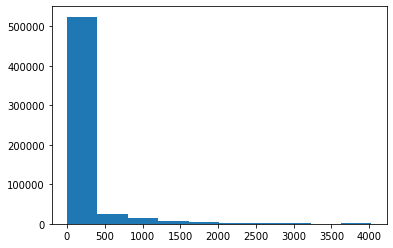

In [17]:
plt.hist(input_old['curr_usg_all_addr_count'].values, bins=10)

(array([5.65523e+05, 1.05430e+04, 4.57500e+03, 7.40000e+02, 3.00000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.50000e+01, 2.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

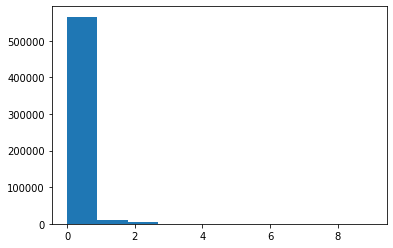

In [18]:
plt.hist(input_new['curr_usg_all_addr_count'].values, bins=10)

In [19]:
df = pd.read_csv('C:\\Users\\glappe\\Documents\\udrive\\Data\\Polo_Rank_Model\\_Archived\\entity_addr_df.csv', 
                 index_col=0)

C:\Users\glappe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\glappe\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
df

,ent_comm_entity_id,ent_comm_comm_type,ent_comm_begin_dt,ent_comm_comm_id,ent_comm_end_dt,ent_comm_src_cat_code,post_comm_id,post_addr_line2,post_addr_line1,post_addr_line0,post_city_cd,post_state_cd,post_zip,post_plus4,ent_st_num,ent_addr_key
0,13422847,OF,1999/03/20,5833370,2003/02/05,ROSTER,5833370,5567 N MEADOWS BLVD,NaN,NaN,COLUMBUS,OH,43229,4180,5567,5567-43229
3,13429932,OF,1999/03/20,5833382,2001/09/02,ROSTER,5833382,20066 FAIRWAY DR,NaN,NaN,GROSSE PT WDS,MI,48236,2437,20066,20066-48236
7,13487379,OF,1999/03/20,5833560,2003/02/05,ROSTER,5833560,3 HIGHLAND CV,NaN,NaN,BIG SPRING,TX,79720,6634,3,3-79720
11,13489147,OF,1999/03/20,5833564,2000/07/08,OBSOLETE,5833564,2001 NORTH OREGON STREET,NaN,NaN,EL PASO,TX,79902,NaN,2001,2001-79902
12,13490694,OF,1999/03/20,5833568,2001/12/06,ROSTER,5833568,15 CREEKVIEW LN,NaN,NaN,DURHAM,NC,27705,5581,15,15-27705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28791668,28261177,OF,2020/02/21,24353848,NaN,ACS,24353848,101 RUE FONTAINE,# 1,NaN,LAFAYETTE,LA,70508,5744,101,101-70508
28791669,28659432,OF,2020/02/21,24353851,NaN,ACS,24353851,237 N 2ND ST,NaN,NaN,EUNICE,LA,70535,3337,237,237-70535
28791745,6728939,OF,2020/02/23,24357781,NaN,PHNSURV,24357781,4745 OGLETOWN STANTON RD,STE 217 # 1,NaN,NEWARK,DE,19713,2074,4745,4745-19713
28791746,11851342,OF,2020/02/23,24357865,NaN,PHNSURV,24357865,11011 MERIDIAN AVE N,NaN,NaN,BITTER LAKE,WA,98133,8967,11011,11011-98133


In [21]:
df.dtypes

ent_comm_entity_id        int64
ent_comm_comm_type       object
ent_comm_begin_dt        object
ent_comm_comm_id          int64
ent_comm_end_dt          object
ent_comm_src_cat_code    object
post_comm_id              int64
post_addr_line2          object
post_addr_line1          object
post_addr_line0          object
post_city_cd             object
post_state_cd            object
post_zip                 object
post_plus4               object
ent_st_num               object
ent_addr_key             object
dtype: object

In [22]:
df['post_comm_id'].value_counts()

726067      1703
12155471    1396
13838502    1201
8272393     1154
15622448     964
            ... 
7828478        1
4754433        1
4764678        1
4772874        1
2436561        1
Name: post_comm_id, Length: 1566651, dtype: int64

In [25]:
df.loc[28791669, 'ent_comm_end_dt']

nan

In [26]:
curr_df = df[df['ent_comm_end_dt'].isna()]
curr_df['post_comm_id'].value_counts()

726067      1695
939674       736
12155471     720
13838502     622
13814716     452
            ... 
19879126       1
8332504        1
6229213        1
24044768       1
11534336       1
Name: post_comm_id, Length: 469918, dtype: int64

In [27]:
curr_df['ent_addr_key'].value_counts()

200-55905     4786
9500-44195    2184
1500-48109    2106
55-02114      1974
330-02215     1799
              ... 
870-93230        1
550-33432        1
517-70583        1
1426-43545       1
932-85937        1
Name: ent_addr_key, Length: 160180, dtype: int64